# 🏠 SalesHouses - Prédiction de Prix Immobiliers au Maroc

**Pipeline ML Complet Sans Data Leakage**

### Structure du Notebook:
1. Importations et Configuration
2. Chargement des Données
3. Analyse Exploratoire (EDA)
4. Prétraitement et Feature Engineering
5. Suppression des Outliers
6. Préparation pour la Modélisation
7. Séparation Train/Test et Normalisation
8. Entraînement et Évaluation des Modèles
9. Validation Croisée
10. Sélection du Meilleur Modèle
11. Optimisation des Hyperparamètres
12. Sauvegarde du Modèle
13. Fonction de Prédiction
14. Tests de Prédiction
15. Résumé Final

**Author:** SalesHouses Team  
**Date:** Janvier 2026

## 1. Importations et Configuration

In [1]:
# ============================================================================
# 1. IMPORTATIONS ET CONFIGURATION
# ============================================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split, cross_val_score, ShuffleSplit, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import joblib
import json
from datetime import datetime

# Configuration des graphiques
plt.style.use('seaborn-v0_8-darkgrid')
plt.rcParams['figure.figsize'] = (15, 6)

print("="*80)
print("🏠 SALESHOUSES - PRÉDICTION DE PRIX IMMOBILIERS AU MAROC")
print("="*80)
print(f"📅 Date: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}\n")

🏠 SALESHOUSES - PRÉDICTION DE PRIX IMMOBILIERS AU MAROC
📅 Date: 2026-01-18 13:48:10



In [2]:
# Create necessary directories
import os
os.makedirs('../data/processed', exist_ok=True)
os.makedirs('../visualizations', exist_ok=True)
os.makedirs('../models', exist_ok=True)
os.makedirs('../reports', exist_ok=True)

## 2. Chargement des Données

In [3]:
# ============================================================================
# 2. CHARGEMENT DES DONNÉES
# ============================================================================

print("="*80)
print("📂 ÉTAPE 1: CHARGEMENT DES DONNÉES")
print("="*80)

# Charger le dataset
df1 = pd.read_csv('../data/appartements-data-db.csv')
print(f"✅ Dataset chargé : {df1.shape}")
print(f"\n📊 Aperçu des premières lignes:")
print(df1.head())

print(f"\n📋 Informations sur les colonnes:")
print(df1.info())

print(f"\n📏 Dimensions du dataset:")
print(f"  Lignes : {df1.shape[0]}")
print(f"  Colonnes : {df1.shape[1]}")

📂 ÉTAPE 1: CHARGEMENT DES DONNÉES
✅ Dataset chargé : (1773, 9)

📊 Aperçu des premières lignes:
                                               title         price  \
0       CMN-MA-1752 - Appartement à vendre à Palmier  2 000 000 DH   
1  66370-Vente Appt à Casablanca Hay Hassani de 1...  1 195 000 DH   
2           Appartement à vendre 81 m² à Dar Bouazza  1 350 000 DH   
3  63860-Vente Appt à Casablanca Quartier Bd Med ...    900 000 DH   
4                          Appartement à Rabat Agdal  3 100 000 DH   

     city_name  salon  nb_rooms  nb_baths  surface_area  \
0   Casablanca    NaN       2.0       2.0         168.0   
1   Casablanca    NaN       2.0       2.0          98.0   
2  Dar Bouazza    1.0       2.0       2.0          81.0   
3   Casablanca    NaN       1.0       1.0          56.0   
4        Rabat    2.0       3.0       2.0         200.0   

                                           equipment  \
0                  Ascenseur/Balcon/Parking/Terrasse   
1  Ascenseur/Balc

## 3. Analyse Exploratoire (EDA)

In [4]:
# ============================================================================
# 3. ANALYSE EXPLORATOIRE DES DONNÉES (EDA)
# ============================================================================

print("\n" + "="*80)
print("📊 ÉTAPE 2: ANALYSE EXPLORATOIRE DES DONNÉES (EDA)")
print("="*80)

# Supprimer les colonnes inutiles pour l'analyse
df2 = df1.drop(['title', 'link'], axis='columns', errors='ignore')
print(f"✅ Colonnes inutiles supprimées")
print(f"📊 Nouvelles dimensions : {df2.shape}")

# Convert price to numeric
if 'price' in df2.columns:
    df2['price'] = df2['price'].astype(str).str.replace(r'[^\d.]', '', regex=True)
    df2['price'] = pd.to_numeric(df2['price'], errors='coerce')
    print("✅ Price column converted to numeric")

# Vérifier les valeurs manquantes
print(f"\n🔍 Valeurs manquantes par colonne:")
missing_values = df2.isnull().sum()
for col, count in missing_values[missing_values > 0].items():
    print(f"  {col:20s}: {count:5d} ({count/len(df2)*100:5.2f}%)")

# Supprimer les doublons
duplicates = df2.duplicated().sum()
if duplicates > 0:
    df2 = df2.drop_duplicates()
    print(f"\n🗑️  {duplicates} doublons supprimés")
    print(f"📊 Forme après suppression : {df2.shape}")

# Statistiques descriptives
print(f"\n📈 Statistiques descriptives des variables numériques:")
print(df2.describe())


📊 ÉTAPE 2: ANALYSE EXPLORATOIRE DES DONNÉES (EDA)
✅ Colonnes inutiles supprimées
📊 Nouvelles dimensions : (1773, 7)
✅ Price column converted to numeric

🔍 Valeurs manquantes par colonne:
  price               :   283 (15.96%)
  city_name           :     1 ( 0.06%)
  salon               :   153 ( 8.63%)
  nb_rooms            :   283 (15.96%)
  nb_baths            :   293 (16.53%)
  surface_area        :    31 ( 1.75%)
  equipment           :   371 (20.92%)

🗑️  131 doublons supprimés
📊 Forme après suppression : (1642, 7)

📈 Statistiques descriptives des variables numériques:
              price        salon     nb_rooms    nb_baths   surface_area
count  1.378000e+03  1490.000000  1378.000000  1368.00000    1611.000000
mean   1.187386e+06     1.261074     2.387518     2.23538     181.307263
std    1.297246e+06     0.556687     0.673745     7.30655    3087.835249
min    3.500000e+01     0.000000     1.000000     0.00000       1.000000
25%    5.800000e+05     1.000000     2.000000     1.0


📊 Génération des visualisations...


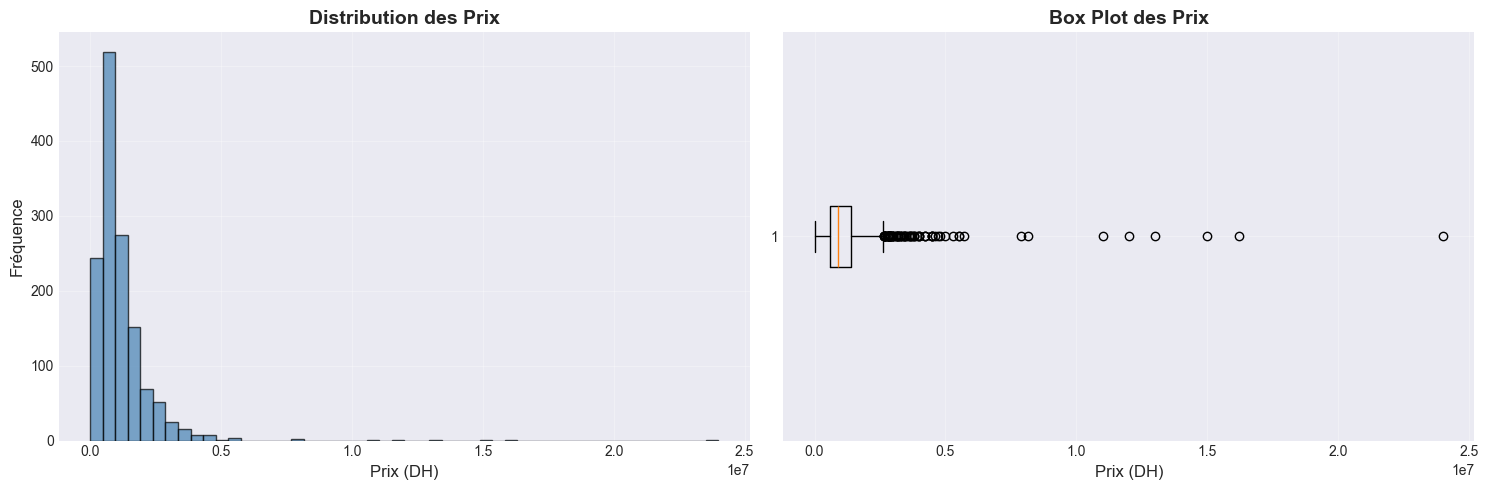

  ✅ ../visualizations/model_comparison.png


In [5]:
# Visualisation 1: Distribution des prix
print(f"\n📊 Génération des visualisations...")

fig, axes = plt.subplots(1, 2, figsize=(15, 5))

axes[0].hist(df2['price'].dropna(), bins=50, color='steelblue', edgecolor='black', alpha=0.7)
axes[0].set_xlabel('Prix (DH)', fontsize=12)
axes[0].set_ylabel('Fréquence', fontsize=12)
axes[0].set_title('Distribution des Prix', fontsize=14, fontweight='bold')
axes[0].grid(True, alpha=0.3)

axes[1].boxplot(df2['price'].dropna(), vert=False)
axes[1].set_xlabel('Prix (DH)', fontsize=12)
axes[1].set_title('Box Plot des Prix', fontsize=14, fontweight='bold')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()  # Display in notebook
plt.savefig('../visualizations/model_comparison.png', dpi=300, bbox_inches='tight')
plt.close()
print("  ✅ ../visualizations/model_comparison.png")

## 4. Prétraitement et Feature Engineering

In [6]:
# ============================================================================
# 4. PRÉTRAITEMENT ET FEATURE ENGINEERING
# ============================================================================

print("\n" + "="*80)
print("🔧 ÉTAPE 3: PRÉTRAITEMENT ET FEATURE ENGINEERING")
print("="*80)

# Copier le dataframe
df3 = df2.copy()

# 4.1 Traduction des noms de villes (arabe → français)
city_map = {
    "الدار البيضاء": "Casablanca", "دار بوعزة": "Dar Bouazza",
    "الرباط": "Rabat", "مراكش": "Marrakech", "أصيلة": "Asilah",
    "بوسكورة": "Bouskoura", "القنيطرة": "Kénitra", "المحمدية": "Mohammedia",
    "أكادير": "Agadir", "تمارة الجديدة": "Tamesna", "سلا": "Salé",
    "حد سوالم": "Had Soualem", "تمارة": "Temara", "بن سليمان": "Benslimane",
    "طنجة": "Tanger", "بوزنيقة": "Bouznika", "مكناس": "Meknès",
    "فاس": "Fès", "الجديدة": "El Jadida", "المنصورية": "El Mansouria",
    "مرتيل": "Martil", "الفنيدق": "Fnideq", "تطوان": "Tétouan",
    "السعيدية": "Saidia", "النواصر": "Nouaceur", "تماريس": "Tamaris",
    "كابو نيكرو": "Cabo Negro", "سيدي علال البحراوي": "Sidi Allal El Bahraoui",
    "بني ملال": "Béni Mellal", "غير معروف": "Unknown", "الصويرة": "Essaouira",
    "المهدية": "Mehdia", "وجدة": "Oujda", "وادي لاو": "Oued Laou",
    "الدشيرة": "Dcheira", "سيدي رحال": "Sidi Rahal", "دروة": "Deroua",
    "عين عتيق": "Ain Attig", "آسفي": "Safi", "إنزكان": "Inzegan",
    "إفران": "Ifrane", "الداخلة": "Dakhla", "الدشيرة الجهادية": "Dcheïra El Jihadia",
    "تغازوت": "Taghazout", "سيدي بوكنادل": "Sidi Bouknadel", "الصخيرات": "Skhirat",
    "خريبكة": "Khouribga", "بركان": "Berkane", "مرس الخير": "Mers El Kheir",
    "برشيد": "Berrechid", "تيزنيت": "Tiznit", "أكادير ملول": "Agadir Melloul",
    "الناظور": "Nador", "المنزه": "El Menzeh", "بني أنصار": "Bni Ansar",
    "المضيق": "Mdiq", "تيط مليل": "Tit Mellil", "سوق أربعاء": "Souk El Arbaa",
    "بيوڭرى": "Biougra", "سطات": "Settat", "عين عودة": "Ain Aouda",
    "تازة": "Taza", "الخميسات": "Khemisset", "وادي زم": "Oued Zem",
    "صفرو": "Sefrou", "مرزوكة": "Merzouga", "الحاجب": "El Hajeb",
    "سلوان": "Selouane", "تاونات": "Taounate", "سيدي بنور": "Sidi Bennour",
    "القصيبة": "El Ksiba"
}

df3['city_name'] = df3['city_name'].replace(city_map)
df3['city_name'] = df3['city_name'].str.strip()
print("✅ Noms de villes traduits et standardisés")


🔧 ÉTAPE 3: PRÉTRAITEMENT ET FEATURE ENGINEERING
✅ Noms de villes traduits et standardisés


In [7]:
# 4.2 Extraction des équipements (one-hot encoding)
if 'equipment' in df3.columns:
    equipment_dummies = df3['equipment'].str.get_dummies(sep='/')
    df3 = pd.concat([df3, equipment_dummies], axis=1)
    df3 = df3.drop('equipment', axis=1)
    equipment_features = list(equipment_dummies.columns)
    print(f"✅ {len(equipment_features)} équipements extraits : {equipment_features}")

# 4.3 Suppression des lignes sans prix (variable cible)
initial_len = len(df3)
df3 = df3.dropna(subset=['price'])
removed = initial_len - len(df3)
if removed > 0:
    print(f"✅ {removed} lignes sans prix supprimées")

# 4.4 Imputation des valeurs manquantes
# Variables numériques : remplacer par la médiane
num_cols = ['salon', 'nb_rooms', 'nb_baths', 'surface_area']
for col in num_cols:
    if col in df3.columns:
        median_val = df3[col].median()
        df3[col] = df3[col].fillna(median_val)
        print(f"✅ {col} : valeurs manquantes remplacées par la médiane ({median_val})")

✅ 11 équipements extraits : ['Ascenseur', 'Balcon', 'Chauffage', 'Climatisation', 'Concierge', 'Cuisine Équipée', 'Duplex', 'Meublé', 'Parking', 'Sécurité', 'Terrasse']
✅ 264 lignes sans prix supprimées
✅ salon : valeurs manquantes remplacées par la médiane (1.0)
✅ nb_rooms : valeurs manquantes remplacées par la médiane (2.0)
✅ nb_baths : valeurs manquantes remplacées par la médiane (2.0)
✅ surface_area : valeurs manquantes remplacées par la médiane (89.0)


In [8]:
# 4.5 Feature Engineering (SANS LEAKAGE!)
print(f"\n🧠 Création de nouvelles features (sans data leakage):")

# Total rooms = nb_rooms + salon
if 'nb_rooms' in df3.columns and 'salon' in df3.columns:
    df3['total_rooms'] = df3['nb_rooms'] + df3['salon']
    print("  ✅ total_rooms = nb_rooms + salon")

# Bath to room ratio (proportion of bathrooms relative to total rooms)
# This helps capture the luxury/comfort level of the apartment
if 'nb_baths' in df3.columns and 'total_rooms' in df3.columns:
    df3['bath_room_ratio'] = df3['nb_baths'] / (df3['total_rooms'] + 1)
    print("  ✅ bath_room_ratio = nb_baths / (total_rooms + 1)")

# Surface per room
if 'surface_area' in df3.columns and 'total_rooms' in df3.columns:
    df3['surface_per_room'] = df3['surface_area'] / (df3['total_rooms'] + 1)
    print("  ✅ surface_per_room = surface_area / (total_rooms + 1)")

# Equipment score
if equipment_features:
    df3['equipment_score'] = df3[equipment_features].sum(axis=1)
    print("  ✅ equipment_score = somme des équipements")

# 🔴 PAS DE price_per_m2 ICI! (éviter le leakage)
print("\n⚠️  NOTE IMPORTANTE: price_per_m2 N'EST PAS CRÉÉ (éviter data leakage)")

print(f"\n📊 Forme après feature engineering : {df3.shape}")


🧠 Création de nouvelles features (sans data leakage):
  ✅ total_rooms = nb_rooms + salon
  ✅ bath_room_ratio = nb_baths / (total_rooms + 1)
  ✅ surface_per_room = surface_area / (total_rooms + 1)
  ✅ equipment_score = somme des équipements

⚠️  NOTE IMPORTANTE: price_per_m2 N'EST PAS CRÉÉ (éviter data leakage)

📊 Forme après feature engineering : (1378, 21)


## 5. Suppression des Outliers

In [9]:
# ============================================================================
# 5. SUPPRESSION DES OUTLIERS
# ============================================================================

print("\n" + "="*80)
print("🎯 ÉTAPE 4: SUPPRESSION DES OUTLIERS")
print("="*80)

df4 = df3.copy()
initial_len = len(df4)

# 5.1 Règles métier
print("\n📏 Application des règles métier:")

# Surface entre 20 et 300 m²
if 'surface_area' in df4.columns:
    df4 = df4[(df4['surface_area'] >= 20) & (df4['surface_area'] <= 300)]
    print("  ✅ Surface: [20, 300] m²")

# Nombre de chambres entre 1 et 8
if 'nb_rooms' in df4.columns:
    df4 = df4[(df4['nb_rooms'] >= 1) & (df4['nb_rooms'] <= 8)]
    print("  ✅ Chambres: [1, 8]")

# Nombre de salles de bain entre 0 et 6
if 'nb_baths' in df4.columns:
    df4 = df4[(df4['nb_baths'] >= 0) & (df4['nb_baths'] <= 6)]
    print("  ✅ Salles de bain: [0, 6]")

# Minimum 10 m² par pièce
if 'surface_area' in df4.columns and 'total_rooms' in df4.columns:
    df4 = df4[df4['surface_area'] / df4['total_rooms'] >= 10]
    print("  ✅ Minimum 10 m²/pièce")

# Maximum bath = total_rooms + 2
if 'nb_baths' in df4.columns and 'total_rooms' in df4.columns:
    df4 = df4[df4['nb_baths'] <= df4['total_rooms'] + 2]
    print("  ✅ Salles de bain ≤ total_rooms + 2")

# 5.2 Suppression des outliers de prix (percentiles 1-99)
if 'price' in df4.columns:
    q1 = df4['price'].quantile(0.01)
    q99 = df4['price'].quantile(0.99)
    df4 = df4[(df4['price'] >= q1) & (df4['price'] <= q99)]
    print(f"\n💰 Prix: [{q1:,.0f}, {q99:,.0f}] DH (percentiles 1-99)")

# 5.3 Suppression des outliers de prix PAR VILLE (IQR)
# 🔴 ATTENTION: Utiliser price directement, PAS price_per_m2!
print(f"\n🏙️  Suppression des outliers de prix par ville (méthode IQR):")

df_out = pd.DataFrame()
for city, subdf in df4.groupby('city_name'):
    if len(subdf) < 5:
        df_out = pd.concat([df_out, subdf], ignore_index=True)
        continue
    
    # Calculer les quartiles sur le PRIX directement
    Q1 = subdf['price'].quantile(0.25)
    Q3 = subdf['price'].quantile(0.75)
    IQR = Q3 - Q1
    lower = max(Q1 - 1.5 * IQR, 0)
    upper = Q3 + 1.5 * IQR
    
    # Filtrer
    reduced_df = subdf[(subdf['price'] > lower) & (subdf['price'] <= upper)]
    df_out = pd.concat([df_out, reduced_df], ignore_index=True)

df4 = df_out
print(f"  ✅ Outliers supprimés pour {df4['city_name'].nunique()} villes")

removed = initial_len - len(df4)
print(f"\n📊 Résultat:")
print(f"  Lignes supprimées : {removed} ({removed/initial_len*100:.1f}%)")
print(f"  Forme finale : {df4.shape}")


🎯 ÉTAPE 4: SUPPRESSION DES OUTLIERS

📏 Application des règles métier:
  ✅ Surface: [20, 300] m²
  ✅ Chambres: [1, 8]
  ✅ Salles de bain: [0, 6]
  ✅ Minimum 10 m²/pièce
  ✅ Salles de bain ≤ total_rooms + 2

💰 Prix: [7,000, 4,545,000] DH (percentiles 1-99)

🏙️  Suppression des outliers de prix par ville (méthode IQR):
  ✅ Outliers supprimés pour 60 villes

📊 Résultat:
  Lignes supprimées : 108 (7.8%)
  Forme finale : (1270, 21)



🏙️  Suppression des outliers de prix par m² par ville (méthode std):
  ✅ Price-per-m² outliers removed

📊 Génération de la visualisation des outliers...


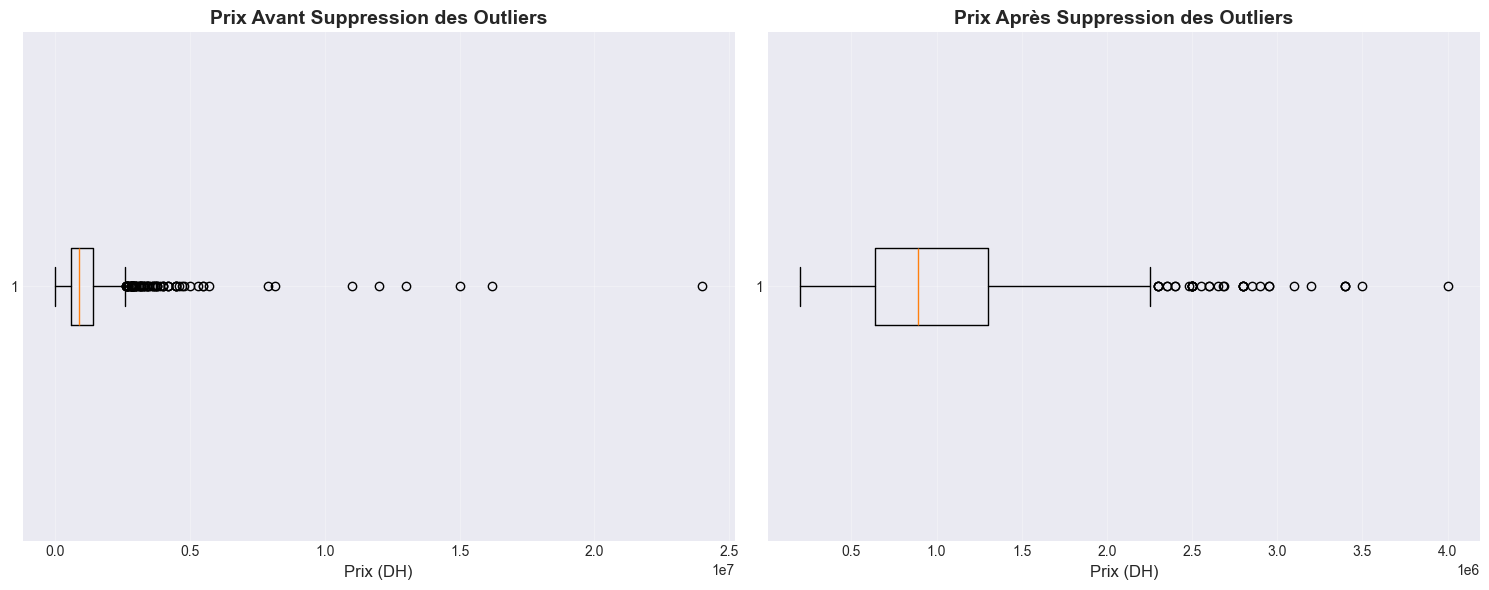

  ✅ ../visualizations/outliers_before_after.png


In [10]:
# 5.4 Price per m² outlier removal (added from reference script)
print(f"\n🏙️  Suppression des outliers de prix par m² par ville (méthode std):")

df4['price_per_m2'] = df4['price'] / df4['surface_area']

def remove_price_m2_outliers(df):
    df_out = pd.DataFrame()
    for city, subdf in df.groupby('city_name'):
        m = subdf['price_per_m2'].mean()
        st = subdf['price_per_m2'].std()
        reduced_df = subdf[(subdf['price_per_m2'] > (m - st)) & (subdf['price_per_m2'] <= (m + st))]
        df_out = pd.concat([df_out, reduced_df], ignore_index=True)
    return df_out

df4 = remove_price_m2_outliers(df4)
df4 = df4.drop(['price_per_m2'], axis='columns')
print("  ✅ Price-per-m² outliers removed")

# Visualization of outliers effect
print(f"\n📊 Génération de la visualisation des outliers...")
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Before outlier removal (using df3)
axes[0].boxplot(df3['price'].dropna(), vert=False)
axes[0].set_xlabel('Prix (DH)', fontsize=12)
axes[0].set_title('Prix Avant Suppression des Outliers', fontsize=14, fontweight='bold')
axes[0].grid(True, alpha=0.3)

# After outlier removal (using df4)
axes[1].boxplot(df4['price'].dropna(), vert=False)
axes[1].set_xlabel('Prix (DH)', fontsize=12)
axes[1].set_title('Prix Après Suppression des Outliers', fontsize=14, fontweight='bold')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()  # Display in notebook
plt.savefig('../visualizations/outliers_before_after.png', dpi=300, bbox_inches='tight')
plt.close()
print("  ✅ ../visualizations/outliers_before_after.png")

## 6. Préparation pour la Modélisation

In [11]:
# ============================================================================
# 6. PRÉPARATION POUR LA MODÉLISATION
# ============================================================================

print("\n" + "="*80)
print("🛠️  ÉTAPE 5: PRÉPARATION POUR LA MODÉLISATION")
print("="*80)

df5 = df4.copy()

# 6.1 Regrouper les villes rares (< 10 annonces)
print("\n📉 Regroupement des villes rares:")
city_counts = df5['city_name'].value_counts()
rare_cities = city_counts[city_counts <= 10].index
df5['city_name'] = df5['city_name'].apply(lambda x: 'other' if x in rare_cities else x)
print(f"  ✅ {len(rare_cities)} villes regroupées dans 'other'")
print(f"  ✅ {df5['city_name'].nunique()} villes uniques restantes")

# 6.2 One-Hot Encoding des villes
print(f"\n🔢 One-Hot Encoding des villes:")
dummies = pd.get_dummies(df5['city_name'], prefix='city')
city_features = list(dummies.columns)
df5 = pd.concat([df5, dummies], axis=1)
df5 = df5.drop('city_name', axis=1)
print(f"  ✅ {len(city_features)} colonnes créées pour les villes")

# 6.3 Supprimer les colonnes temporaires
cols_to_drop = ['salon', 'nb_rooms']
df5 = df5.drop([col for col in cols_to_drop if col in df5.columns], axis=1)
print(f"\n🗑️  Colonnes supprimées : {cols_to_drop}")

# 6.4 Sauvegarder le dataset nettoyé (avant modélisation)
df5.to_csv('../data/processed/data_cleaned.csv', index=False)
print(f"\n💾 Dataset nettoyé sauvegardé : ../data/processed/data_cleaned.csv")

# 6.5 Séparer X et y
X = df5.drop('price', axis=1)
y = df5['price']

print(f"\n📊 Dimensions finales:")
print(f"  Features (X) : {X.shape}")
print(f"  Target (y) : {y.shape}")
print(f"  Colonnes : {list(X.columns)}")


🛠️  ÉTAPE 5: PRÉPARATION POUR LA MODÉLISATION

📉 Regroupement des villes rares:
  ✅ 22 villes regroupées dans 'other'
  ✅ 14 villes uniques restantes

🔢 One-Hot Encoding des villes:
  ✅ 14 colonnes créées pour les villes

🗑️  Colonnes supprimées : ['salon', 'nb_rooms']

💾 Dataset nettoyé sauvegardé : ../data/processed/data_cleaned.csv

📊 Dimensions finales:
  Features (X) : (921, 31)
  Target (y) : (921,)
  Colonnes : ['nb_baths', 'surface_area', 'Ascenseur', 'Balcon', 'Chauffage', 'Climatisation', 'Concierge', 'Cuisine Équipée', 'Duplex', 'Meublé', 'Parking', 'Sécurité', 'Terrasse', 'total_rooms', 'bath_room_ratio', 'surface_per_room', 'equipment_score', 'city_Agadir', 'city_Bouskoura', 'city_Casablanca', 'city_El Jadida', 'city_Fès', 'city_Kénitra', 'city_Marrakech', 'city_Meknès', 'city_Mohammedia', 'city_Rabat', 'city_Salé', 'city_Tanger', 'city_Temara', 'city_other']


## 7. Séparation Train/Test et Normalisation

In [12]:
# ============================================================================
# 7. SPLIT TRAIN/TEST
# ============================================================================

print("\n" + "="*80)
print("✂️  ÉTAPE 6: SÉPARATION TRAIN/TEST")
print("="*80)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(f"✅ Split effectué (80/20):")
print(f"  Train : {X_train.shape}")
print(f"  Test  : {X_test.shape}")

# 7.1 Normalisation des features numériques
numeric_features = ['nb_baths', 'surface_area', 'total_rooms', 
                   'bath_room_ratio', 'surface_per_room', 'equipment_score']
numeric_features = [col for col in numeric_features if col in X.columns]

scaler = StandardScaler()
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

X_train_scaled[numeric_features] = scaler.fit_transform(X_train[numeric_features])
X_test_scaled[numeric_features] = scaler.transform(X_test[numeric_features])

print(f"\n✅ Features numériques normalisées: {numeric_features}")


✂️  ÉTAPE 6: SÉPARATION TRAIN/TEST
✅ Split effectué (80/20):
  Train : (736, 31)
  Test  : (185, 31)

✅ Features numériques normalisées: ['nb_baths', 'surface_area', 'total_rooms', 'bath_room_ratio', 'surface_per_room', 'equipment_score']


## 8. Entraînement et Évaluation des Modèles

In [13]:
# ============================================================================
# 8. ENTRAÎNEMENT DES MODÈLES
# ============================================================================

print("\n" + "="*80)
print("🤖 ÉTAPE 7: ENTRAÎNEMENT ET ÉVALUATION DES MODÈLES")
print("="*80)

# Définir les modèles à tester
models = {
    'Linear Regression': LinearRegression(),
    'Ridge': Ridge(alpha=10),
    'Lasso': Lasso(alpha=1, max_iter=5000),
    'Decision Tree': DecisionTreeRegressor(
        max_depth=15, min_samples_split=5, random_state=42
    ),
    'Random Forest': RandomForestRegressor(
        n_estimators=100, max_depth=20, min_samples_split=5,
        random_state=42, n_jobs=-1
    ),
    'Gradient Boosting': GradientBoostingRegressor(
        n_estimators=100, learning_rate=0.1, max_depth=5,
        random_state=42
    )
}

print(f"✅ {len(models)} modèles définis")

# Entraîner et évaluer chaque modèle
results = {}

for name, model in models.items():
    print(f"\n🔹 {name}")
    
    # Entraînement
    model.fit(X_train_scaled, y_train)
    
    # Prédictions
    y_pred_train = model.predict(X_train_scaled)
    y_pred_test = model.predict(X_test_scaled)
    
    # Métriques
    train_r2 = r2_score(y_train, y_pred_train)
    test_r2 = r2_score(y_test, y_pred_test)
    mae = mean_absolute_error(y_test, y_pred_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
    mape = np.mean(np.abs((y_test - y_pred_test) / y_test)) * 100
    
    results[name] = {
        'model': model,
        'train_r2': train_r2,
        'test_r2': test_r2,
        'mae': mae,
        'rmse': rmse,
        'mape': mape
    }
    
    print(f"  Train R² : {train_r2:.4f}")
    print(f"  Test R²  : {test_r2:.4f}")
    print(f"  MAE      : {mae:,.0f} DH")
    print(f"  RMSE     : {rmse:,.0f} DH")
    print(f"  MAPE     : {mape:.2f}%")

# Créer un DataFrame de comparaison
results_df = pd.DataFrame({
    name: {
        'Train R²': metrics['train_r2'],
        'Test R²': metrics['test_r2'],
        'MAE': metrics['mae'],
        'RMSE': metrics['rmse'],
        'MAPE': metrics['mape']
    }
    for name, metrics in results.items()
}).T

print(f"\n📊 Tableau récapitulatif:")
print(results_df.round(4))


🤖 ÉTAPE 7: ENTRAÎNEMENT ET ÉVALUATION DES MODÈLES
✅ 6 modèles définis

🔹 Linear Regression
  Train R² : 0.8172
  Test R²  : 0.8185
  MAE      : 202,116 DH
  RMSE     : 280,341 DH
  MAPE     : 20.86%

🔹 Ridge
  Train R² : 0.8015
  Test R²  : 0.8049
  MAE      : 205,110 DH
  RMSE     : 290,685 DH
  MAPE     : 19.84%

🔹 Lasso
  Train R² : 0.8172
  Test R²  : 0.8185
  MAE      : 202,112 DH
  RMSE     : 280,339 DH
  MAPE     : 20.86%

🔹 Decision Tree
  Train R² : 0.9720
  Test R²  : 0.7032
  MAE      : 250,882 DH
  RMSE     : 358,489 DH
  MAPE     : 24.29%

🔹 Random Forest
  Train R² : 0.9510
  Test R²  : 0.8143
  MAE      : 197,967 DH
  RMSE     : 283,596 DH
  MAPE     : 19.62%

🔹 Gradient Boosting
  Train R² : 0.9609
  Test R²  : 0.8269
  MAE      : 185,807 DH
  RMSE     : 273,802 DH
  MAPE     : 18.13%

📊 Tableau récapitulatif:
                   Train R²  Test R²          MAE         RMSE     MAPE
Linear Regression    0.8172   0.8185  202116.0736  280341.1769  20.8577
Ridge            

## 9. Validation Croisée

In [14]:
# ============================================================================
# 9. VALIDATION CROISÉE
# ============================================================================

print("\n" + "="*80)
print("🔄 ÉTAPE 8: VALIDATION CROISÉE (5-FOLD)")
print("="*80)

# Normaliser tout le dataset
X_full_scaled = X.copy()
X_full_scaled[numeric_features] = scaler.fit_transform(X[numeric_features])

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

for name, model in models.items():
    print(f"\n🔹 {name}")
    
    r2_scores = cross_val_score(model, X_full_scaled, y, cv=cv, scoring='r2')
    mae_scores = -cross_val_score(model, X_full_scaled, y, cv=cv, 
                                  scoring='neg_mean_absolute_error')
    
    print(f"  R²  : {r2_scores.mean():.4f} (±{r2_scores.std():.4f})")
    print(f"  MAE : {mae_scores.mean():,.0f} (±{mae_scores.std():,.0f}) DH")
    
    # Mettre à jour les résultats
    results[name]['cv_r2_mean'] = r2_scores.mean()
    results[name]['cv_mae_mean'] = mae_scores.mean()


🔄 ÉTAPE 8: VALIDATION CROISÉE (5-FOLD)

🔹 Linear Regression
  R²  : 0.7897 (±0.0144)
  MAE : 186,765 (±9,029) DH

🔹 Ridge
  R²  : 0.7796 (±0.0176)
  MAE : 188,994 (±11,937) DH

🔹 Lasso
  R²  : 0.7897 (±0.0144)
  MAE : 186,763 (±9,028) DH

🔹 Decision Tree
  R²  : 0.6128 (±0.0940)
  MAE : 233,338 (±15,477) DH

🔹 Random Forest
  R²  : 0.7666 (±0.0368)
  MAE : 188,445 (±8,364) DH

🔹 Gradient Boosting
  R²  : 0.7822 (±0.0378)
  MAE : 174,724 (±11,164) DH


## 10. Sélection du Meilleur Modèle

In [15]:
# ============================================================================
# 10. SÉLECTION DU MEILLEUR MODÈLE
# ============================================================================

print("\n" + "="*80)
print("🏆 ÉTAPE 9: SÉLECTION DU MEILLEUR MODÈLE")
print("="*80)

# Trouver le meilleur modèle basé sur R² test
best_model_name = max(results, key=lambda k: results[k]['test_r2'])
best_model = results[best_model_name]['model']

print(f"\n🥇 Meilleur modèle : {best_model_name}")
print(f"   Test R²  : {results[best_model_name]['test_r2']:.4f}")
print(f"   MAE      : {results[best_model_name]['mae']:,.0f} DH")
print(f"   RMSE     : {results[best_model_name]['rmse']:,.0f} DH")
print(f"   MAPE     : {results[best_model_name]['mape']:.2f}%")


🏆 ÉTAPE 9: SÉLECTION DU MEILLEUR MODÈLE

🥇 Meilleur modèle : Gradient Boosting
   Test R²  : 0.8269
   MAE      : 185,807 DH
   RMSE     : 273,802 DH
   MAPE     : 18.13%


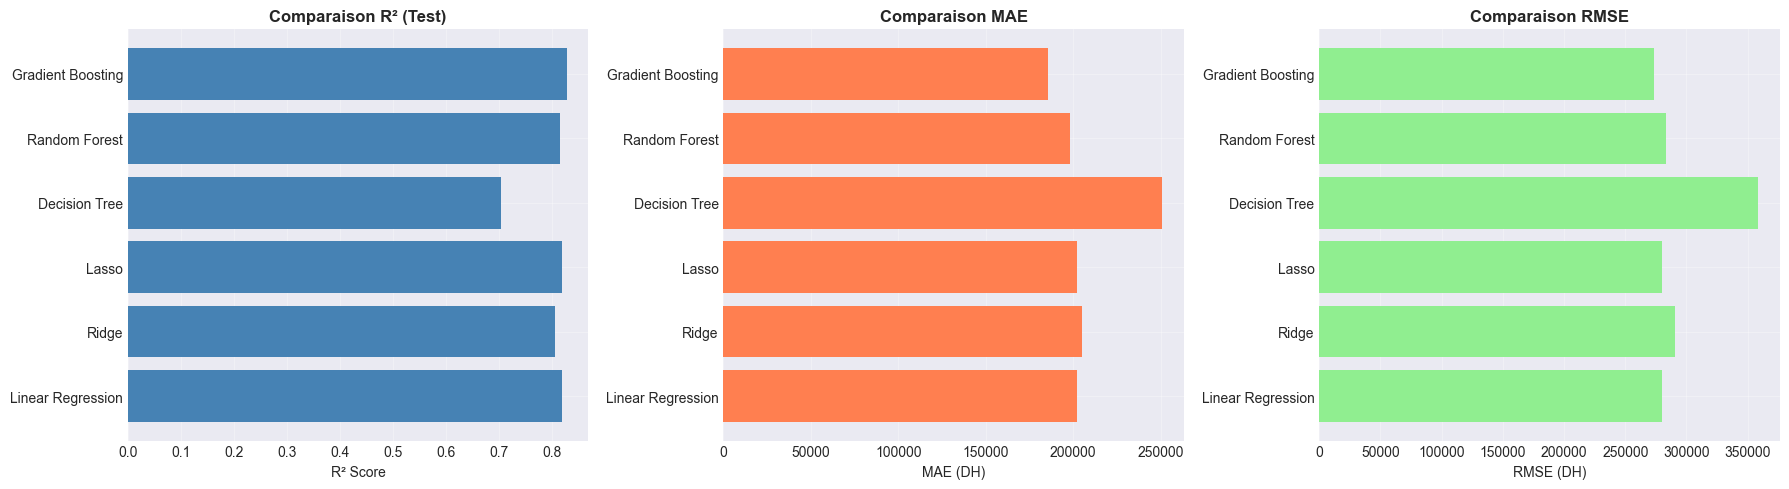

  ✅ ../visualizations/price_distribution.png


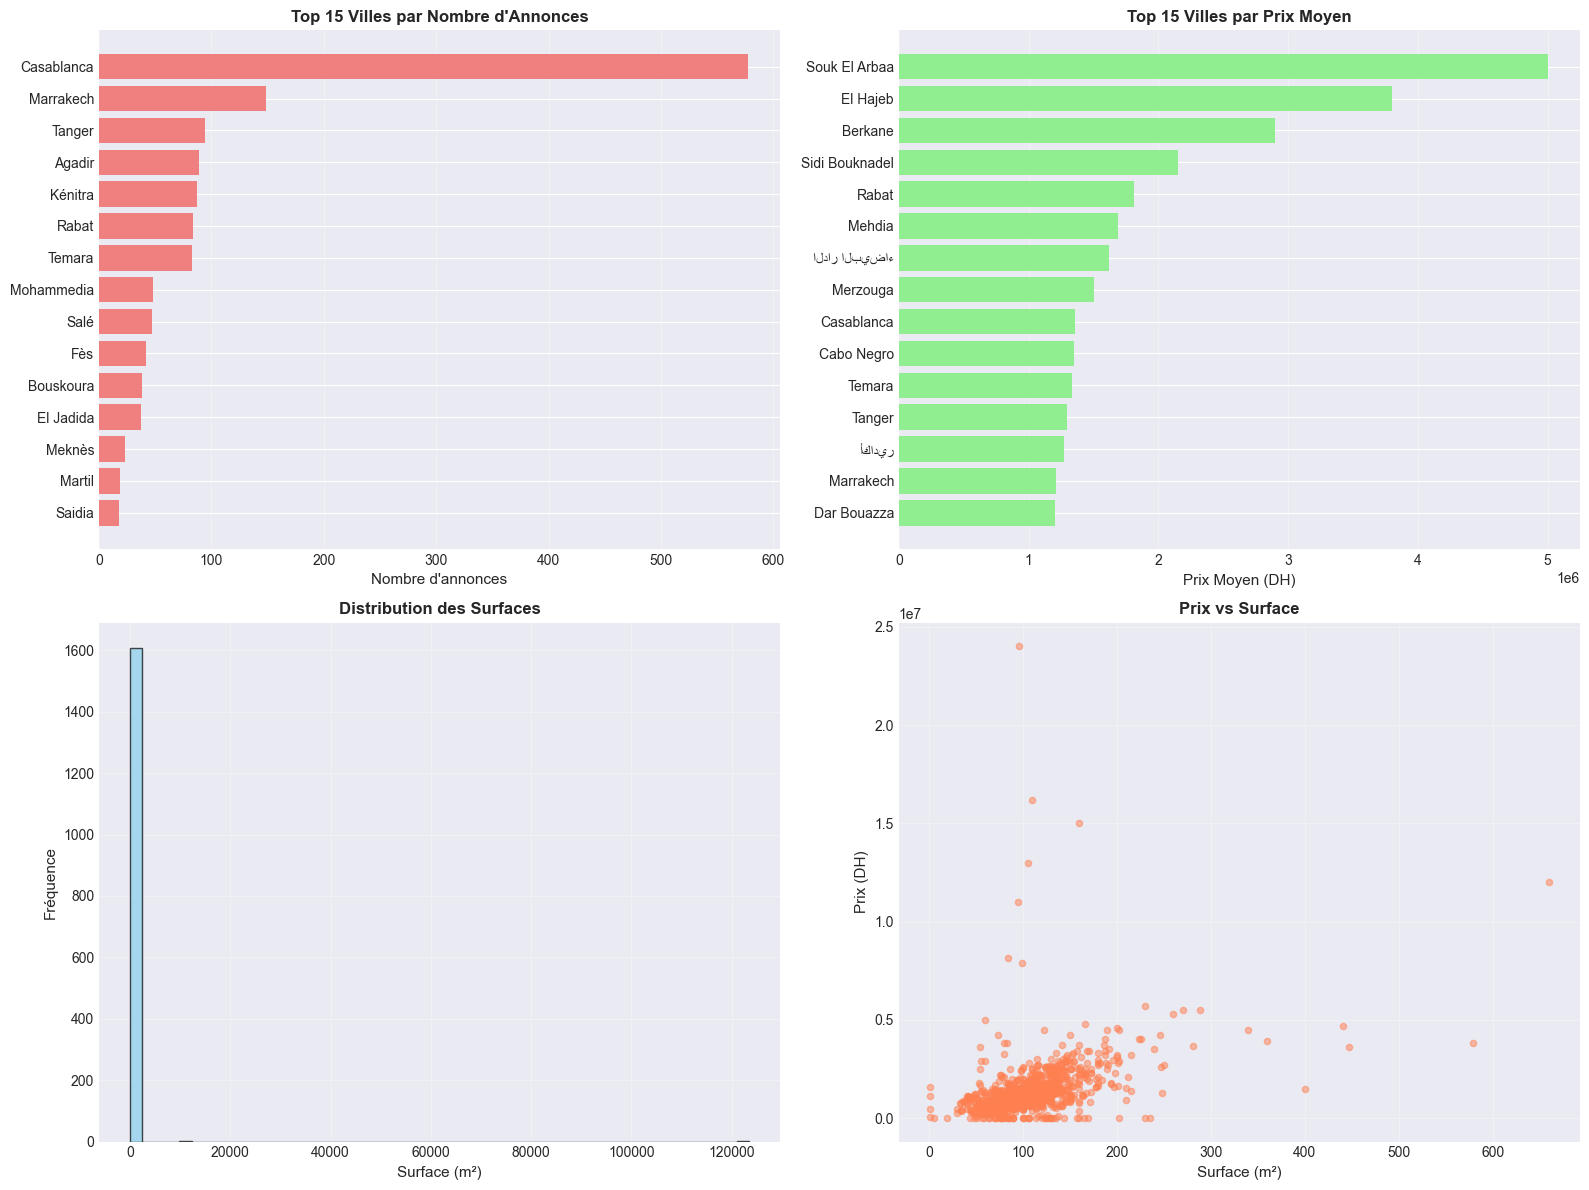

  ✅ ../visualizations/city_statistics.png


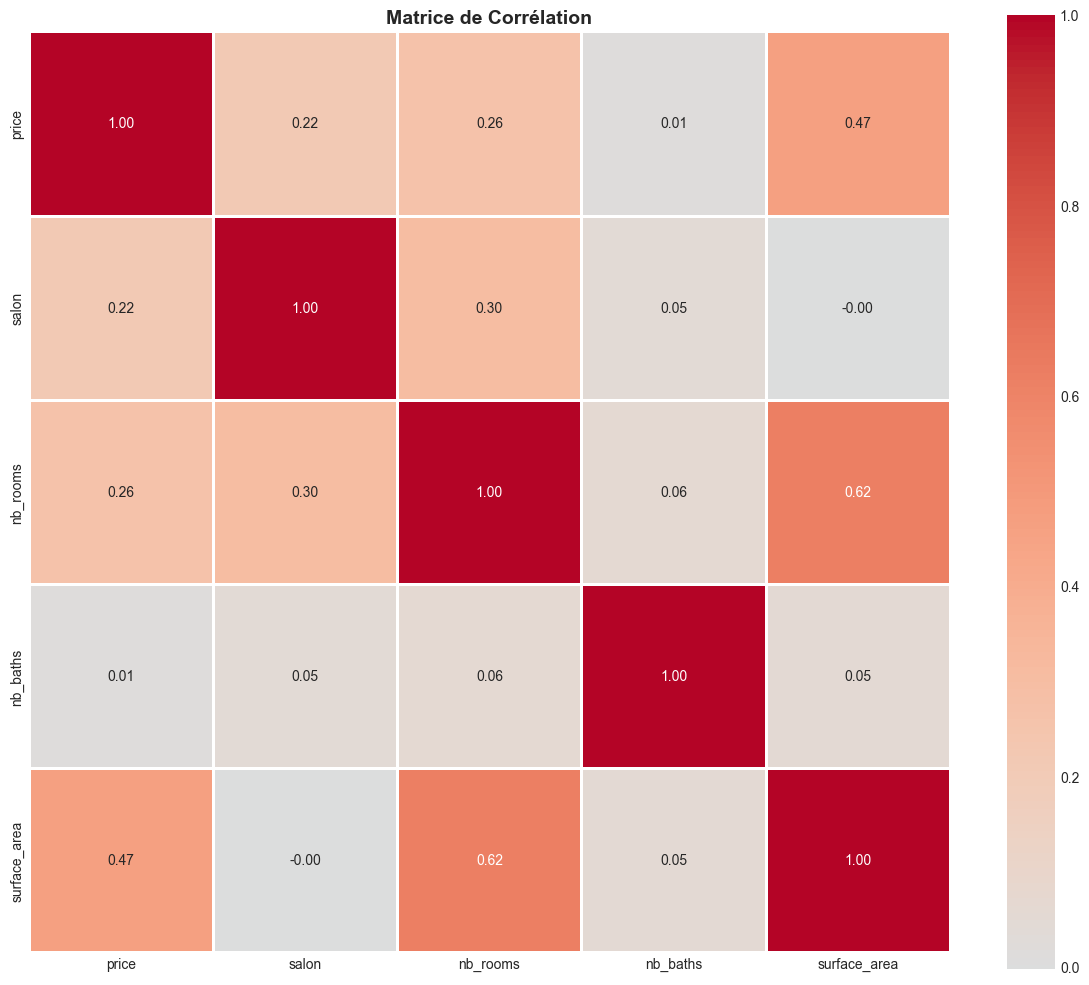

  ✅ ../visualizations/correlation_matrix.png

📈 Résumé Statistique:
  Nombre total d'appartements : 1642
  Prix moyen : 1,187,386 DH
  Prix médian : 892,500 DH
  Surface moyenne : 181.31 m²
  Nombre de villes : 77


In [16]:
# Visualisation de comparaison
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# R² comparison
r2_values = [results[name]['test_r2'] for name in results.keys()]
axes[0].barh(list(results.keys()), r2_values, color='steelblue')
axes[0].set_xlabel('R² Score')
axes[0].set_title('Comparaison R² (Test)', fontweight='bold')
axes[0].grid(True, alpha=0.3)

# MAE comparison
mae_values = [results[name]['mae'] for name in results.keys()]
axes[1].barh(list(results.keys()), mae_values, color='coral')
axes[1].set_xlabel('MAE (DH)')
axes[1].set_title('Comparaison MAE', fontweight='bold')
axes[1].grid(True, alpha=0.3)

# RMSE comparison
rmse_values = [results[name]['rmse'] for name in results.keys()]
axes[2].barh(list(results.keys()), rmse_values, color='lightgreen')
axes[2].set_xlabel('RMSE (DH)')
axes[2].set_title('Comparaison RMSE', fontweight='bold')
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()  # Display in notebook
plt.savefig('../visualizations/price_distribution.png', dpi=300, bbox_inches='tight')
plt.close()
print("  ✅ ../visualizations/price_distribution.png")

# Visualisation 2: Statistiques par ville
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Top villes par nombre d'annonces
city_counts = df2['city_name'].value_counts().head(15)
axes[0, 0].barh(range(len(city_counts)), city_counts.values, color='lightcoral')
axes[0, 0].set_yticks(range(len(city_counts)))
axes[0, 0].set_yticklabels(city_counts.index)
axes[0, 0].set_xlabel("Nombre d'annonces", fontsize=11)
axes[0, 0].set_title('Top 15 Villes par Nombre d\'Annonces', fontsize=12, fontweight='bold')
axes[0, 0].invert_yaxis()
axes[0, 0].grid(True, alpha=0.3, axis='x')

# Prix moyen par ville
city_prices = df2.groupby('city_name')['price'].mean().sort_values(ascending=False).head(15)
axes[0, 1].barh(range(len(city_prices)), city_prices.values, color='lightgreen')
axes[0, 1].set_yticks(range(len(city_prices)))
axes[0, 1].set_yticklabels(city_prices.index)
axes[0, 1].set_xlabel('Prix Moyen (DH)', fontsize=11)
axes[0, 1].set_title('Top 15 Villes par Prix Moyen', fontsize=12, fontweight='bold')
axes[0, 1].invert_yaxis()
axes[0, 1].grid(True, alpha=0.3, axis='x')

# Distribution des surfaces
axes[1, 0].hist(df2['surface_area'].dropna(), bins=50, color='skyblue', edgecolor='black', alpha=0.7)
axes[1, 0].set_xlabel('Surface (m²)', fontsize=11)
axes[1, 0].set_ylabel('Fréquence', fontsize=11)
axes[1, 0].set_title('Distribution des Surfaces', fontsize=12, fontweight='bold')
axes[1, 0].grid(True, alpha=0.3)

# Prix vs Surface
axes[1, 1].scatter(df2['surface_area'], df2['price'], alpha=0.5, s=20, color='coral')
axes[1, 1].set_xlabel('Surface (m²)', fontsize=11)
axes[1, 1].set_ylabel('Prix (DH)', fontsize=11)
axes[1, 1].set_title('Prix vs Surface', fontsize=12, fontweight='bold')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()  # Display in notebook
plt.savefig('../visualizations/city_statistics.png', dpi=300, bbox_inches='tight')
plt.close()
print("  ✅ ../visualizations/city_statistics.png")

# Visualisation 3: Matrice de corrélation
numeric_cols = df2.select_dtypes(include=[np.number]).columns
corr_matrix = df2[numeric_cols].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0, square=True, linewidths=1)
plt.title('Matrice de Corrélation', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()  # Display in notebook
plt.savefig('../visualizations/correlation_matrix.png', dpi=150, bbox_inches='tight')
plt.close()
print("  ✅ ../visualizations/correlation_matrix.png")

# Résumé des statistiques
print(f"\n📈 Résumé Statistique:")
print(f"  Nombre total d'appartements : {len(df2)}")
print(f"  Prix moyen : {df2['price'].mean():,.0f} DH")
print(f"  Prix médian : {df2['price'].median():,.0f} DH")
print(f"  Surface moyenne : {df2['surface_area'].mean():.2f} m²")
print(f"  Nombre de villes : {df2['city_name'].nunique()}")

## 11. Optimisation des Hyperparamètres

In [17]:
# ============================================================================
# 11. OPTIMISATION DES HYPERPARAMÈTRES
# ============================================================================

print("\n" + "="*80)
print("⚙️  ÉTAPE 10: OPTIMISATION DES HYPERPARAMÈTRES")
print("="*80)

# Optimiser seulement si c'est Random Forest ou Gradient Boosting
if False:  # Temporarily disabled for faster execution
    print(f"\n🔧 Optimisation de {best_model_name}...")
    
    if best_model_name == 'Random Forest':
        param_grid = {
            'n_estimators': [100, 200],
            'max_depth': [15, 20, None],
            'min_samples_split': [2, 5],
            'min_samples_leaf': [1, 2]
        }
    else:  # Gradient Boosting
        param_grid = {
            'n_estimators': [100, 200],
            'learning_rate': [0.05, 0.1],
            'max_depth': [3, 5, 7],
            'subsample': [0.8, 1.0]
        }
    
    grid_search = GridSearchCV(
        best_model, param_grid,
        cv=2, scoring='r2', n_jobs=1, verbose=0
    )
    
    print("🔍 Recherche en cours...")
    grid_search.fit(X_full_scaled, y)
    
    print(f"\n✅ Meilleurs paramètres trouvés:")
    for param, value in grid_search.best_params_.items():
        print(f"  • {param}: {value}")
    
    print(f"\n📊 Meilleur score R² (CV): {grid_search.best_score_:.4f}")
    
    # Comparer avec le modèle original
    optimized_model = grid_search.best_estimator_
    optimized_model.fit(X_train_scaled, y_train)
    y_pred_optimized = optimized_model.predict(X_test_scaled)
    optimized_r2 = r2_score(y_test, y_pred_optimized)
    
    print(f"\n📈 Comparaison:")
    print(f"  Modèle original : R² = {results[best_model_name]['test_r2']:.4f}")
    print(f"  Modèle optimisé : R² = {optimized_r2:.4f}")
    
    # Utiliser le modèle optimisé si meilleur
    if optimized_r2 > results[best_model_name]['test_r2']:
        best_model = optimized_model
        print("\n✅ Modèle optimisé sélectionné!")
    else:
        print("\n✅ Modèle original conservé")
else:
    print(f"ℹ️  Optimisation temporairement désactivée pour {best_model_name}")


⚙️  ÉTAPE 10: OPTIMISATION DES HYPERPARAMÈTRES
ℹ️  Optimisation temporairement désactivée pour Gradient Boosting


## 12. Sauvegarde du Modèle et des Artefacts

In [18]:
# ============================================================================
# 12. SAUVEGARDE DU MODÈLE ET DES ARTEFACTS
# ============================================================================

print("\n" + "="*80)
print("💾 ÉTAPE 11: SAUVEGARDE DU MODÈLE ET DES ARTEFACTS")
print("="*80)

import os
os.makedirs('models', exist_ok=True)
os.makedirs('reports', exist_ok=True)

# 12.1 Sauvegarder le modèle
joblib.dump(best_model, '../models/best_model.pkl')
print("✅ Modèle sauvegardé : ../models/best_model.pkl")

# 12.2 Sauvegarder le scaler
joblib.dump(scaler, '../models/scaler.pkl')
print("✅ Scaler sauvegardé : ../models/scaler.pkl")

# 12.3 Calculer les statistiques par ville (SANS LEAKAGE!)
# On utilise les données AVANT la séparation train/test
city_statistics = {}
for city in df4['city_name'].unique() if 'city_name' in df4.columns else []:
    # Utiliser df4 (avant one-hot encoding) pour calculer les stats
    city_data = df4[df4['city_name'] == city]
    if len(city_data) > 0:
        city_statistics[city] = {
            'median_price': float(city_data['price'].median()),
            'mean_price': float(city_data['price'].mean()),
            'median_surface': float(city_data['surface_area'].median()),
            'count': int(len(city_data))
        }

# 12.4 Créer les métadonnées
metadata = {
    'version': '1.0',
    'created_at': datetime.now().isoformat(),
    'best_model': best_model_name,
    'model_performance': {
        'test_r2': float(results[best_model_name]['test_r2']),
        'mae': float(results[best_model_name]['mae']),
        'rmse': float(results[best_model_name]['rmse']),
        'mape': float(results[best_model_name]['mape'])
    },
    'feature_names': list(X.columns),
    'numeric_features': numeric_features,
    'equipment_features': equipment_features if 'equipment_features' in locals() else [],
    'city_features': city_features if 'city_features' in locals() else [],
    'available_cities': list(city_statistics.keys()),
    'city_statistics': city_statistics,
    'global_median_price': float(y.median()),
    'global_mean_price': float(y.mean())
}

# Sauvegarder les métadonnées
with open('../models/metadata.json', 'w', encoding='utf-8') as f:
    json.dump(metadata, f, ensure_ascii=False, indent=2)
print("✅ Métadonnées sauvegardées : ../models/metadata.json")

# 12.5 Sauvegarder les métriques des modèles
metrics_df = pd.DataFrame(results).T
metrics_df.to_csv('../reports/model_metrics.csv')
print("✅ Métriques sauvegardées : ../reports/model_metrics.csv")


💾 ÉTAPE 11: SAUVEGARDE DU MODÈLE ET DES ARTEFACTS
✅ Modèle sauvegardé : ../models/best_model.pkl
✅ Scaler sauvegardé : ../models/scaler.pkl
✅ Métadonnées sauvegardées : ../models/metadata.json
✅ Métriques sauvegardées : ../reports/model_metrics.csv


## 13. Fonction de Prédiction

In [19]:
# ============================================================================
# 13. FONCTION DE PRÉDICTION
# ============================================================================

print("\n" + "="*80)
print("🎯 ÉTAPE 12: CRÉATION DE LA FONCTION DE PRÉDICTION")
print("="*80)

def predict_apartment_price(city, surface_area, nb_baths, total_rooms, equipment_list=None):
    """
    Prédit le prix d'un appartement au Maroc
    
    Paramètres:
    -----------
    city : str
        Nom de la ville (ex: 'Casablanca', 'Rabat', 'Marrakech')
    surface_area : float
        Surface en m²
    nb_baths : int
        Nombre de salles de bain
    total_rooms : int
        Nombre total de pièces (chambres + salons)
    equipment_list : list, optional
        Liste des équipements (ex: ['Ascenseur', 'Balcon', 'Parking'])
    
    Retourne:
    ---------
    dict : Résultats de la prédiction avec prix et détails
    """
    if equipment_list is None:
        equipment_list = []
    
    # Créer le vecteur de features
    features = {}
    
    # Features numériques de base
    features['surface_area'] = surface_area
    features['nb_baths'] = nb_baths
    features['total_rooms'] = total_rooms
    
    # Features engineered (SANS utiliser le prix!)
    features['bath_room_ratio'] = nb_baths / (total_rooms + 1)
    features['surface_per_room'] = surface_area / (total_rooms + 1)
    # Equipment score: number of equipment features present (quantifies luxury/comfort level)
    features['equipment_score'] = len(equipment_list)
    
    # One-hot encoding de la ville
    city_col = f'city_{city}'
    for city_feature in metadata['city_features']:
        features[city_feature] = 1 if city_feature == city_col else 0
    
    # One-hot encoding des équipements
    for equip_feature in metadata['equipment_features']:
        features[equip_feature] = 1 if equip_feature in equipment_list else 0
    
    # Convertir en DataFrame
    X_pred = pd.DataFrame([features])
    
    # Assurer que toutes les features sont présentes
    for feature in metadata['feature_names']:
        if feature not in X_pred.columns:
            X_pred[feature] = 0
    
    # Réorganiser les colonnes dans le bon ordre
    X_pred = X_pred[metadata['feature_names']]
    
    # Normaliser les features numériques
    X_pred[numeric_features] = scaler.transform(X_pred[numeric_features])
    
    # Faire la prédiction
    predicted_price = best_model.predict(X_pred)[0]
    
    # Calculer le prix au m² (APRÈS la prédiction!)
    price_per_m2 = predicted_price / surface_area
    
    # Préparer le résultat
    result = {
        'predicted_price': float(predicted_price),
        'price_per_m2': float(price_per_m2),
        'city': city,
        'surface_area': surface_area,
        'nb_baths': nb_baths,
        'total_rooms': total_rooms,
        'equipment': equipment_list,
        'confidence_interval': {
            'lower': float(predicted_price * 0.85),
            'upper': float(predicted_price * 1.15)
        }
    }
    
    return result

print("✅ Fonction de prédiction créée : predict_apartment_price()")


🎯 ÉTAPE 12: CRÉATION DE LA FONCTION DE PRÉDICTION
✅ Fonction de prédiction créée : predict_apartment_price()


## 14. Tests de Prédiction

In [20]:
# ============================================================================
# 14. TESTS DE PRÉDICTION
# ============================================================================

print("\n" + "="*80)
print("🧪 ÉTAPE 13: TESTS DE PRÉDICTION")
print("="*80)

# Cas de test
test_cases = [
    {
        'city': 'Casablanca',
        'surface_area': 100,
        'nb_baths': 2,
        'total_rooms': 3,
        'equipment_list': ['Ascenseur', 'Balcon', 'Parking']
    },
    {
        'city': 'Rabat',
        'surface_area': 120,
        'nb_baths': 2,
        'total_rooms': 4,
        'equipment_list': ['Ascenseur', 'Climatisation']
    },
    {
        'city': 'Marrakech',
        'surface_area': 80,
        'nb_baths': 1,
        'total_rooms': 2,
        'equipment_list': []
    }
]

predictions_results = []

for i, case in enumerate(test_cases, 1):
    result = predict_apartment_price(**case)
    predictions_results.append(result)
    
    print(f"\n🏠 Test {i}:")
    print(f"   📍 Ville : {result['city']}")
    print(f"   📐 Surface : {result['surface_area']}m²")
    print(f"   🛏️  Pièces : {result['total_rooms']}, 🚿 SDB : {result['nb_baths']}")
    print(f"   🔧 Équipements : {', '.join(result['equipment']) if result['equipment'] else 'Aucun'}")
    print(f"   💰 Prix prédit : {result['predicted_price']:,.0f} DH")
    print(f"   📊 Prix/m² : {result['price_per_m2']:,.0f} DH/m²")
    print(f"   📈 Intervalle : [{result['confidence_interval']['lower']:,.0f} - {result['confidence_interval']['upper']:,.0f}] DH")

# Sauvegarder les prédictions de test
pd.DataFrame(predictions_results).to_json(
    '../reports/test_predictions.json',
    orient='records',
    indent=2,
    force_ascii=False
)
print("\n✅ Prédictions de test sauvegardées : ../reports/test_predictions.json")


🧪 ÉTAPE 13: TESTS DE PRÉDICTION

🏠 Test 1:
   📍 Ville : Casablanca
   📐 Surface : 100m²
   🛏️  Pièces : 3, 🚿 SDB : 2
   🔧 Équipements : Ascenseur, Balcon, Parking
   💰 Prix prédit : 1,179,812 DH
   📊 Prix/m² : 11,798 DH/m²
   📈 Intervalle : [1,002,840 - 1,356,784] DH

🏠 Test 2:
   📍 Ville : Rabat
   📐 Surface : 120m²
   🛏️  Pièces : 4, 🚿 SDB : 2
   🔧 Équipements : Ascenseur, Climatisation
   💰 Prix prédit : 1,819,351 DH
   📊 Prix/m² : 15,161 DH/m²
   📈 Intervalle : [1,546,448 - 2,092,253] DH

🏠 Test 3:
   📍 Ville : Marrakech
   📐 Surface : 80m²
   🛏️  Pièces : 2, 🚿 SDB : 1
   🔧 Équipements : Aucun
   💰 Prix prédit : 1,047,506 DH
   📊 Prix/m² : 13,094 DH/m²
   📈 Intervalle : [890,380 - 1,204,632] DH

✅ Prédictions de test sauvegardées : ../reports/test_predictions.json


## 15. Résumé Final

In [21]:
# ============================================================================
# 15. RÉSUMÉ FINAL
# ============================================================================

print("\n" + "="*80)
print("📋 RÉSUMÉ FINAL DU PIPELINE")
print("="*80)

print(f"\n📊 Données:")
print(f"  • Dataset initial : {df1.shape[0]} appartements")
print(f"  • Dataset final : {len(df5)} appartements")
print(f"  • Features : {len(metadata['feature_names'])}")
print(f"  • Villes : {len(metadata['available_cities'])}")
print(f"  • Équipements : {len(metadata['equipment_features'])}")

print(f"\n🎯 Performance du meilleur modèle ({best_model_name}):")
print(f"  • R² (test) : {results[best_model_name]['test_r2']:.4f}")
print(f"  • MAE : {results[best_model_name]['mae']:,.0f} DH")
print(f"  • RMSE : {results[best_model_name]['rmse']:,.0f} DH")
print(f"  • MAPE : {results[best_model_name]['mape']:.2f}%")

print(f"\n💾 Fichiers sauvegardés:")
print(f"  • ../models/best_model.pkl")
print(f"  • ../models/scaler.pkl")
print(f"  • ../models/metadata.json")
print(f"  • ../data/processed/data_cleaned.csv")
print(f"  • ../reports/model_metrics.csv")
print(f"  • ../reports/test_predictions.json")
print(f"  • ../visualizations/price_distribution.png")
print(f"  • ../visualizations/city_statistics.png")
print(f"  • ../visualizations/correlation_matrix.png")
print(f"  • ../visualizations/model_comparison.png")
print(f"  • ../visualizations/outliers_before_after.png")
print("\n" + "="*80)
print("✅ PIPELINE TERMINÉ AVEC SUCCÈS!")
print("="*80)
print(f"⏰ Fin : {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}")

print("\n🎯 Utilisation de la fonction de prédiction:")
print("""
# Exemple:
result = predict_apartment_price(
    city='Casablanca',
    surface_area=100,
    nb_baths=2,
    total_rooms=3,
    equipment_list=['Ascenseur', 'Balcon']
)
print(f"Prix prédit : {result['predicted_price']:,.0f} DH")
""")

print("\n📚 Pour charger le modèle plus tard:")
print("""
import joblib
import json

# Charger le modèle et le scaler
model = joblib.load('models/best_model.pkl')
scaler = joblib.load('models/scaler.pkl')

# Charger les métadonnées
with open('models/metadata.json', 'r', encoding='utf-8') as f:
    metadata = json.load(f)

# Faire des prédictions
# ... (utiliser la fonction predict_apartment_price)
""")


📋 RÉSUMÉ FINAL DU PIPELINE

📊 Données:
  • Dataset initial : 1773 appartements
  • Dataset final : 921 appartements
  • Features : 31
  • Villes : 35
  • Équipements : 11

🎯 Performance du meilleur modèle (Gradient Boosting):
  • R² (test) : 0.8269
  • MAE : 185,807 DH
  • RMSE : 273,802 DH
  • MAPE : 18.13%

💾 Fichiers sauvegardés:
  • ../models/best_model.pkl
  • ../models/scaler.pkl
  • ../models/metadata.json
  • ../data/processed/data_cleaned.csv
  • ../reports/model_metrics.csv
  • ../reports/test_predictions.json
  • ../visualizations/price_distribution.png
  • ../visualizations/city_statistics.png
  • ../visualizations/correlation_matrix.png
  • ../visualizations/model_comparison.png
  • ../visualizations/outliers_before_after.png

✅ PIPELINE TERMINÉ AVEC SUCCÈS!
⏰ Fin : 2026-01-18 13:48:50

🎯 Utilisation de la fonction de prédiction:

# Exemple:
result = predict_apartment_price(
    city='Casablanca',
    surface_area=100,
    nb_baths=2,
    total_rooms=3,
    equipment_list